<a href="https://colab.research.google.com/github/WithTheMoonRabbit/demographics_analysis/blob/main/HouseMembersByHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이름   :  유성운  
학번  :   201844087


In [ ]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt


!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
#최적의 Arima 파라미터를 찾기 위해 auto_arima 라이브러리 설치
pip install pmdarima

In [ ]:
pip install --upgrade typing-extensions

In [ ]:
pip install --upgrade tensorflow-probability

In [ ]:
pip install fastapi kaleido python-multipart uvicorn

In [ ]:
!pip install scalecast

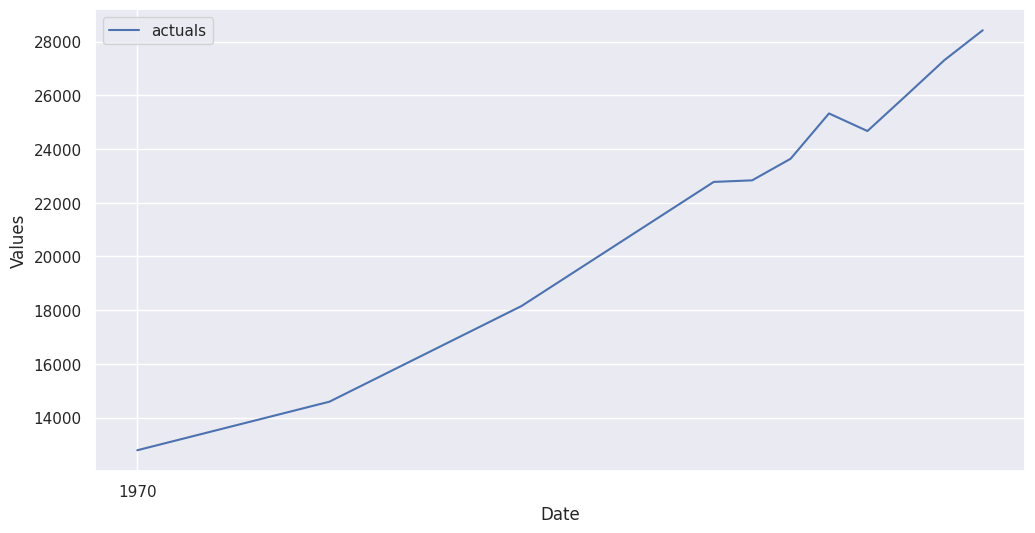

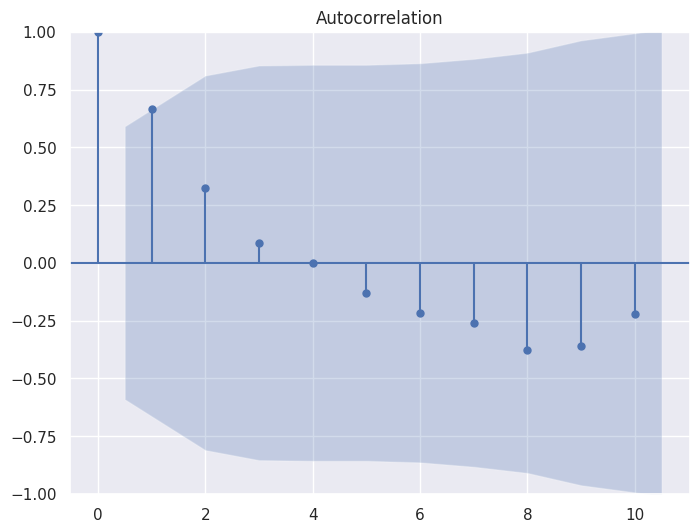

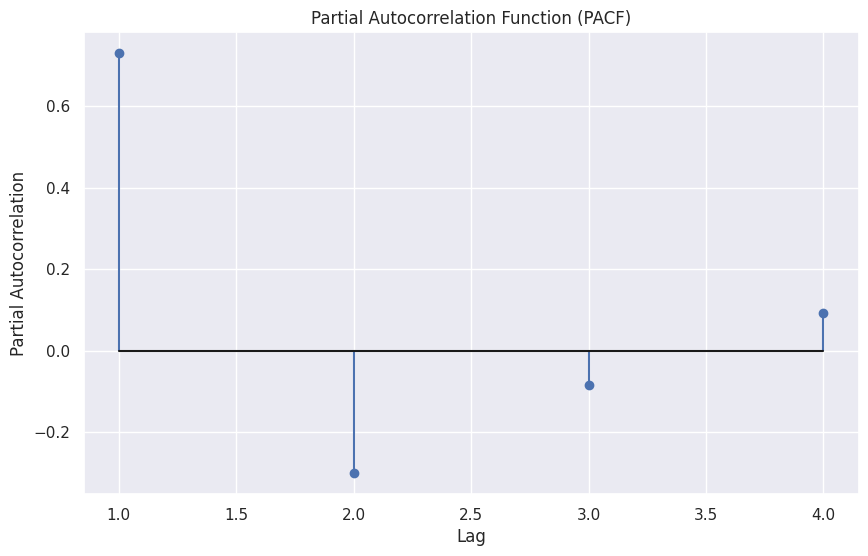

In [27]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from math import sqrt

from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import to_datetime
from statsmodels.tsa.stattools import pacf

%matplotlib inline

np.set_printoptions(formatter={'float_kind':'{:f}'.format})

sns.set(rc={'figure.figsize':(8,6)})

import itertools
import warnings
import datetime
from datetime import datetime
warnings.filterwarnings('ignore')
from scalecast.Forecaster import Forecaster
import matplotlib.pyplot as plt
import pandas_datareader as pdr

file_path = '/content/demographics1.xlsx'  # 파일 경로 수정
df = pd.read_excel(file_path)
df.set_index('연도', inplace=True)

column_to_forecast = '종로구'

f = Forecaster(y=df[column_to_forecast], current_dates=df.index)

f.plot()

f.plot_acf()

# PACF를 계산
lags = min(int(len(df1) * 0.5) - 1, 10)  # 샘플 크기의 50% 이하로 설정
pacf_values = pacf(df1[column_to_forecast], nlags=lags)

# PACF 결과를 시각화
plt.figure(figsize=(10, 6))
plt.stem(range(1, lags + 1), pacf_values[1:], use_line_collection=True, basefmt="k-")
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



ARIMA 모델 예측 결과:
      예측  신뢰구간 (95%) 하한  신뢰구간 (95%) 상한
2023 NaN            NaN            NaN
2024 NaN            NaN            NaN
2025 NaN            NaN            NaN
2026 NaN            NaN            NaN
2027 NaN            NaN            NaN


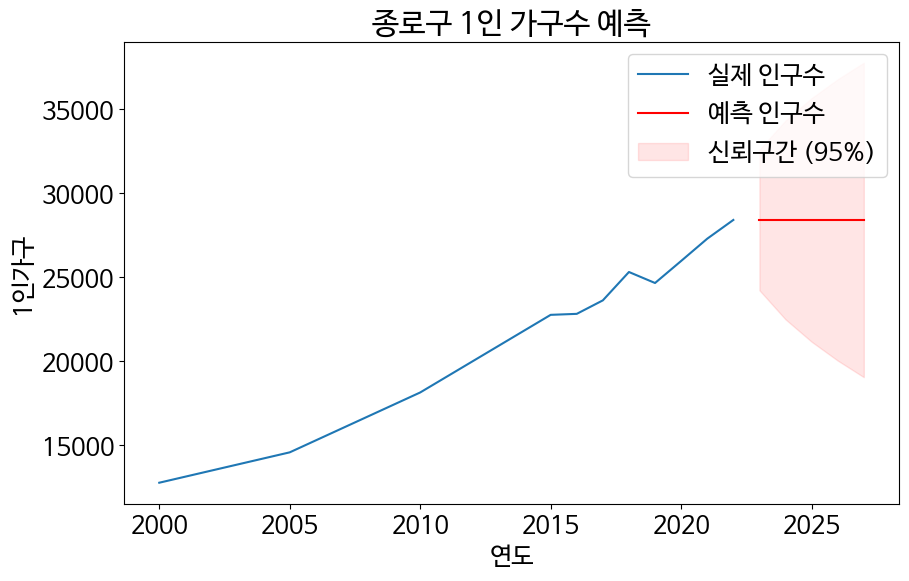

In [ ]:
# 단계 3: 한글 폰트 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

file_path = '/content/demographics1.xlsx'  # 파일 경로 수정
df1 = pd.read_excel(file_path)
df1
df1.set_index('연도', inplace=True)

# ARIMA 모델 학습 및 예측
city1_data = df1['종로구']

# 최적의 ARIMA 파라미터 찾기
model = auto_arima(city1_data, suppress_warnings=True, seasonal=False)
order = model.order

# ARIMA 모델 생성
model = ARIMA(city1_data, order=order)
results = model.fit()

# 미래 인구수 예측 (5년 후까지 예측)
forecast_steps = 5
forecast = results.get_forecast(steps=forecast_steps)

# 예측 결과 출력
forecast_index = range(df1.index.max() + 1, df1.index.max() + 1 + forecast_steps)
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

print("ARIMA 모델 예측 결과:")
print(pd.DataFrame({'예측': forecast_values, '신뢰구간 (95%) 하한': forecast_ci.iloc[:, 0], '신뢰구간 (95%) 상한': forecast_ci.iloc[:, 1]}, index=forecast_index))

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(df1.index, city1_data, label='실제 인구수')
plt.plot(forecast_index, forecast_values, color='red', label='예측 인구수')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.1, label='신뢰구간 (95%)')
plt.title('종로구 1인 가구수 예측')
plt.xlabel('연도')
plt.ylabel('1인가구')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



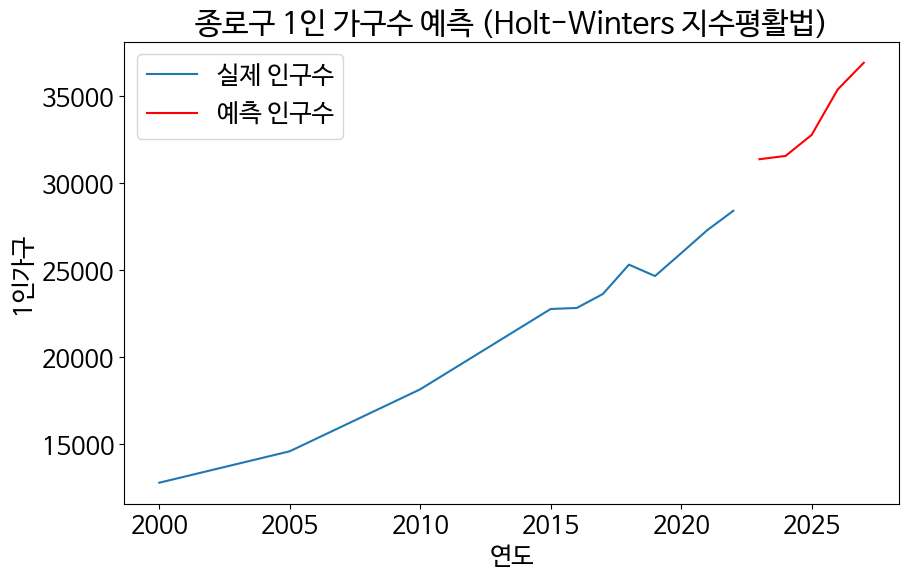

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib as mpl
import matplotlib.font_manager as fm

file_path = '/content/demographics1.xlsx'  # 파일 경로 수정
df1 = pd.read_excel(file_path)
df1.set_index('연도', inplace=True)

# Holt-Winters 지수평활법 모델 학습 및 예측
city1_data = df1['종로구']

# Holt-Winters 모델 생성
model = ExponentialSmoothing(city1_data, trend='add', seasonal='add', seasonal_periods=4)
results = model.fit()

# 미래 인구수 예측 (5년 후까지 예측)
forecast_steps = 5
forecast = results.forecast(steps=forecast_steps)

# 예측 결과 출력
forecast_index = range(df1.index.max() + 1, df1.index.max() + 1 + forecast_steps)
forecast_values = forecast
forecast_ci = None

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(df1.index, city1_data, label='실제 인구수')
plt.plot(forecast_index, forecast_values, color='red', label='예측 인구수')
plt.title('종로구 1인 가구수 예측 (Holt-Winters 지수평활법)')
plt.xlabel('연도')
plt.ylabel('1인가구')
plt.legend()
plt.show()


최적의 p, d, q 값: (0, 1, 0)
ARIMA 모델 예측 결과:
      예측  신뢰구간 (95%) 하한  신뢰구간 (95%) 상한
2023 NaN            NaN            NaN
2024 NaN            NaN            NaN
2025 NaN            NaN            NaN
2026 NaN            NaN            NaN
2027 NaN            NaN            NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



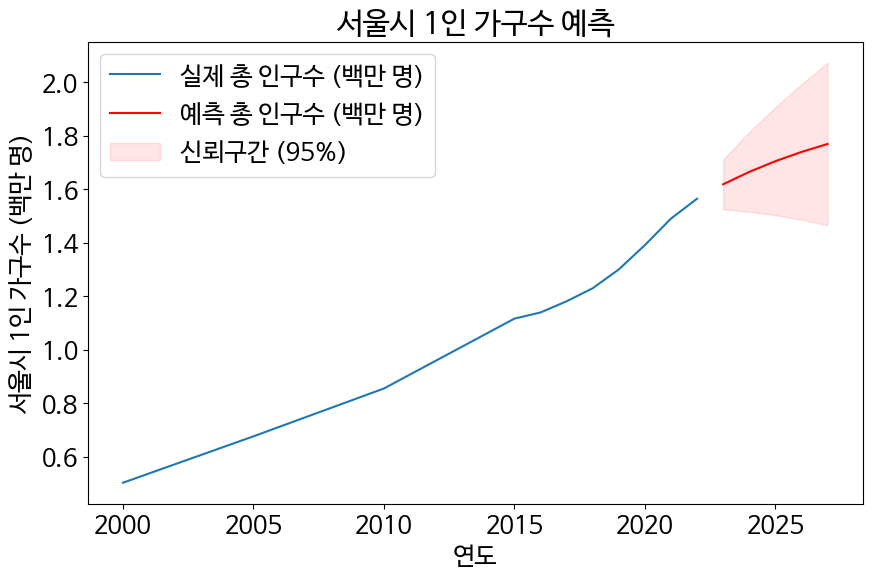

In [ ]:
import pandas as pd
import pmdarima as pm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',  # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

# 서울시 1인 가구수 데이터 불러오기
file_path = '/content/demographics1.xlsx'
df = pd.read_excel(file_path)
df.set_index('연도', inplace=True)

# ARIMA 모델 학습 및 예측
total_population_data = df.sum(axis=1)

# ARIMA 모델 생성
model = ARIMA(total_population_data, order=(1, 1, 1))  # ARIMA(p, d, q)의 파라미터 조합 설정
results = model.fit()

# 미래 인구수 예측 (5년 후까지 예측)
forecast_steps = 5
forecast = results.get_forecast(steps=forecast_steps)

# 예측 결과 출력
forecast_index = range(df.index.max() + 1, df.index.max() + 1 + forecast_steps)
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

print("ARIMA 모델 예측 결과:")
print(pd.DataFrame({'예측': forecast_values, '신뢰구간 (95%) 하한': forecast_ci.iloc[:, 0], '신뢰구간 (95%) 상한': forecast_ci.iloc[:, 1]}, index=forecast_index))

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(df.index, total_population_data / 1_000_000, label='실제 총 인구수 (백만 명)')
plt.plot(forecast_index, forecast_values / 1_000_000, color='red', label='예측 총 인구수 (백만 명)')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0] / 1_000_000, forecast_ci.iloc[:, 1] / 1_000_000, color='red', alpha=0.1, label='신뢰구간 (95%)')
plt.title('서울시 1인 가구수 예측')
plt.xlabel('연도')
plt.ylabel('서울시 1인 가구수 (백만 명)')
plt.legend()
plt.show()

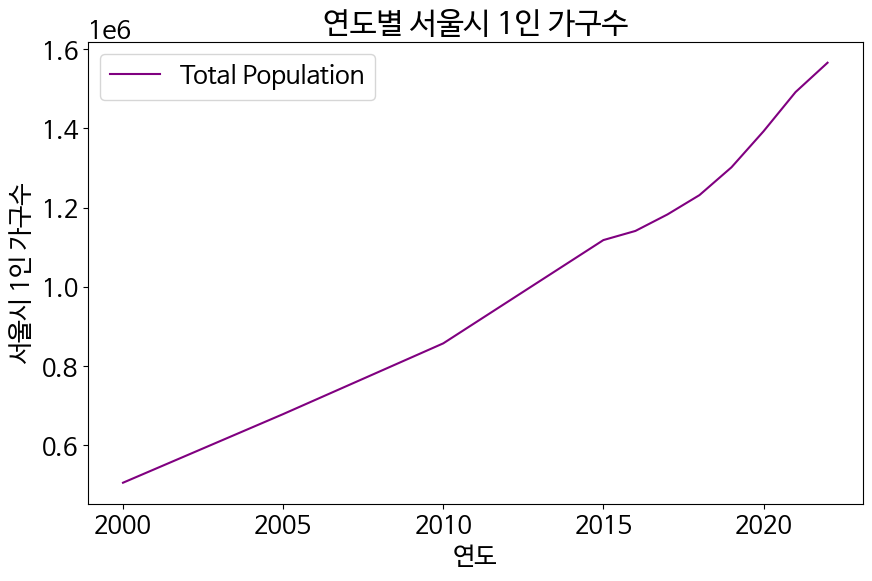

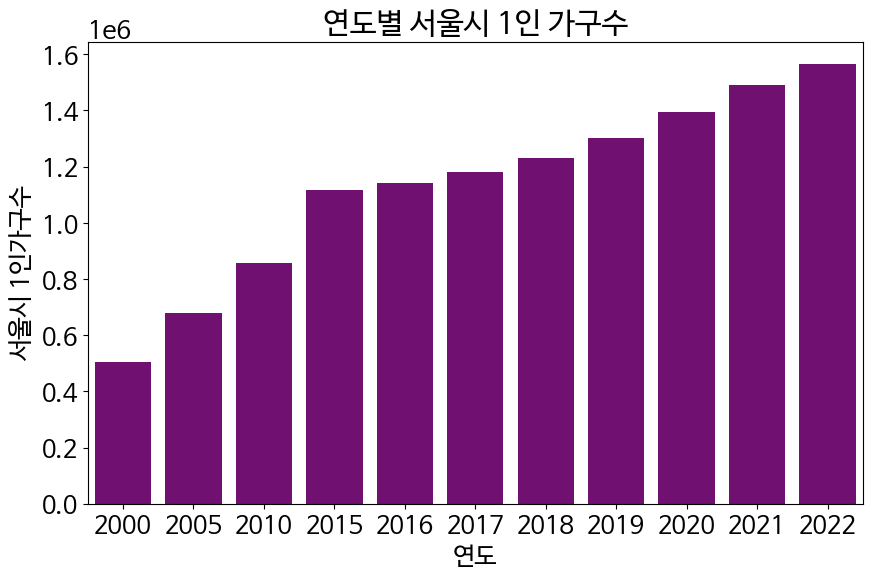

Text(333.72222222222223, 0.5, '서울시')

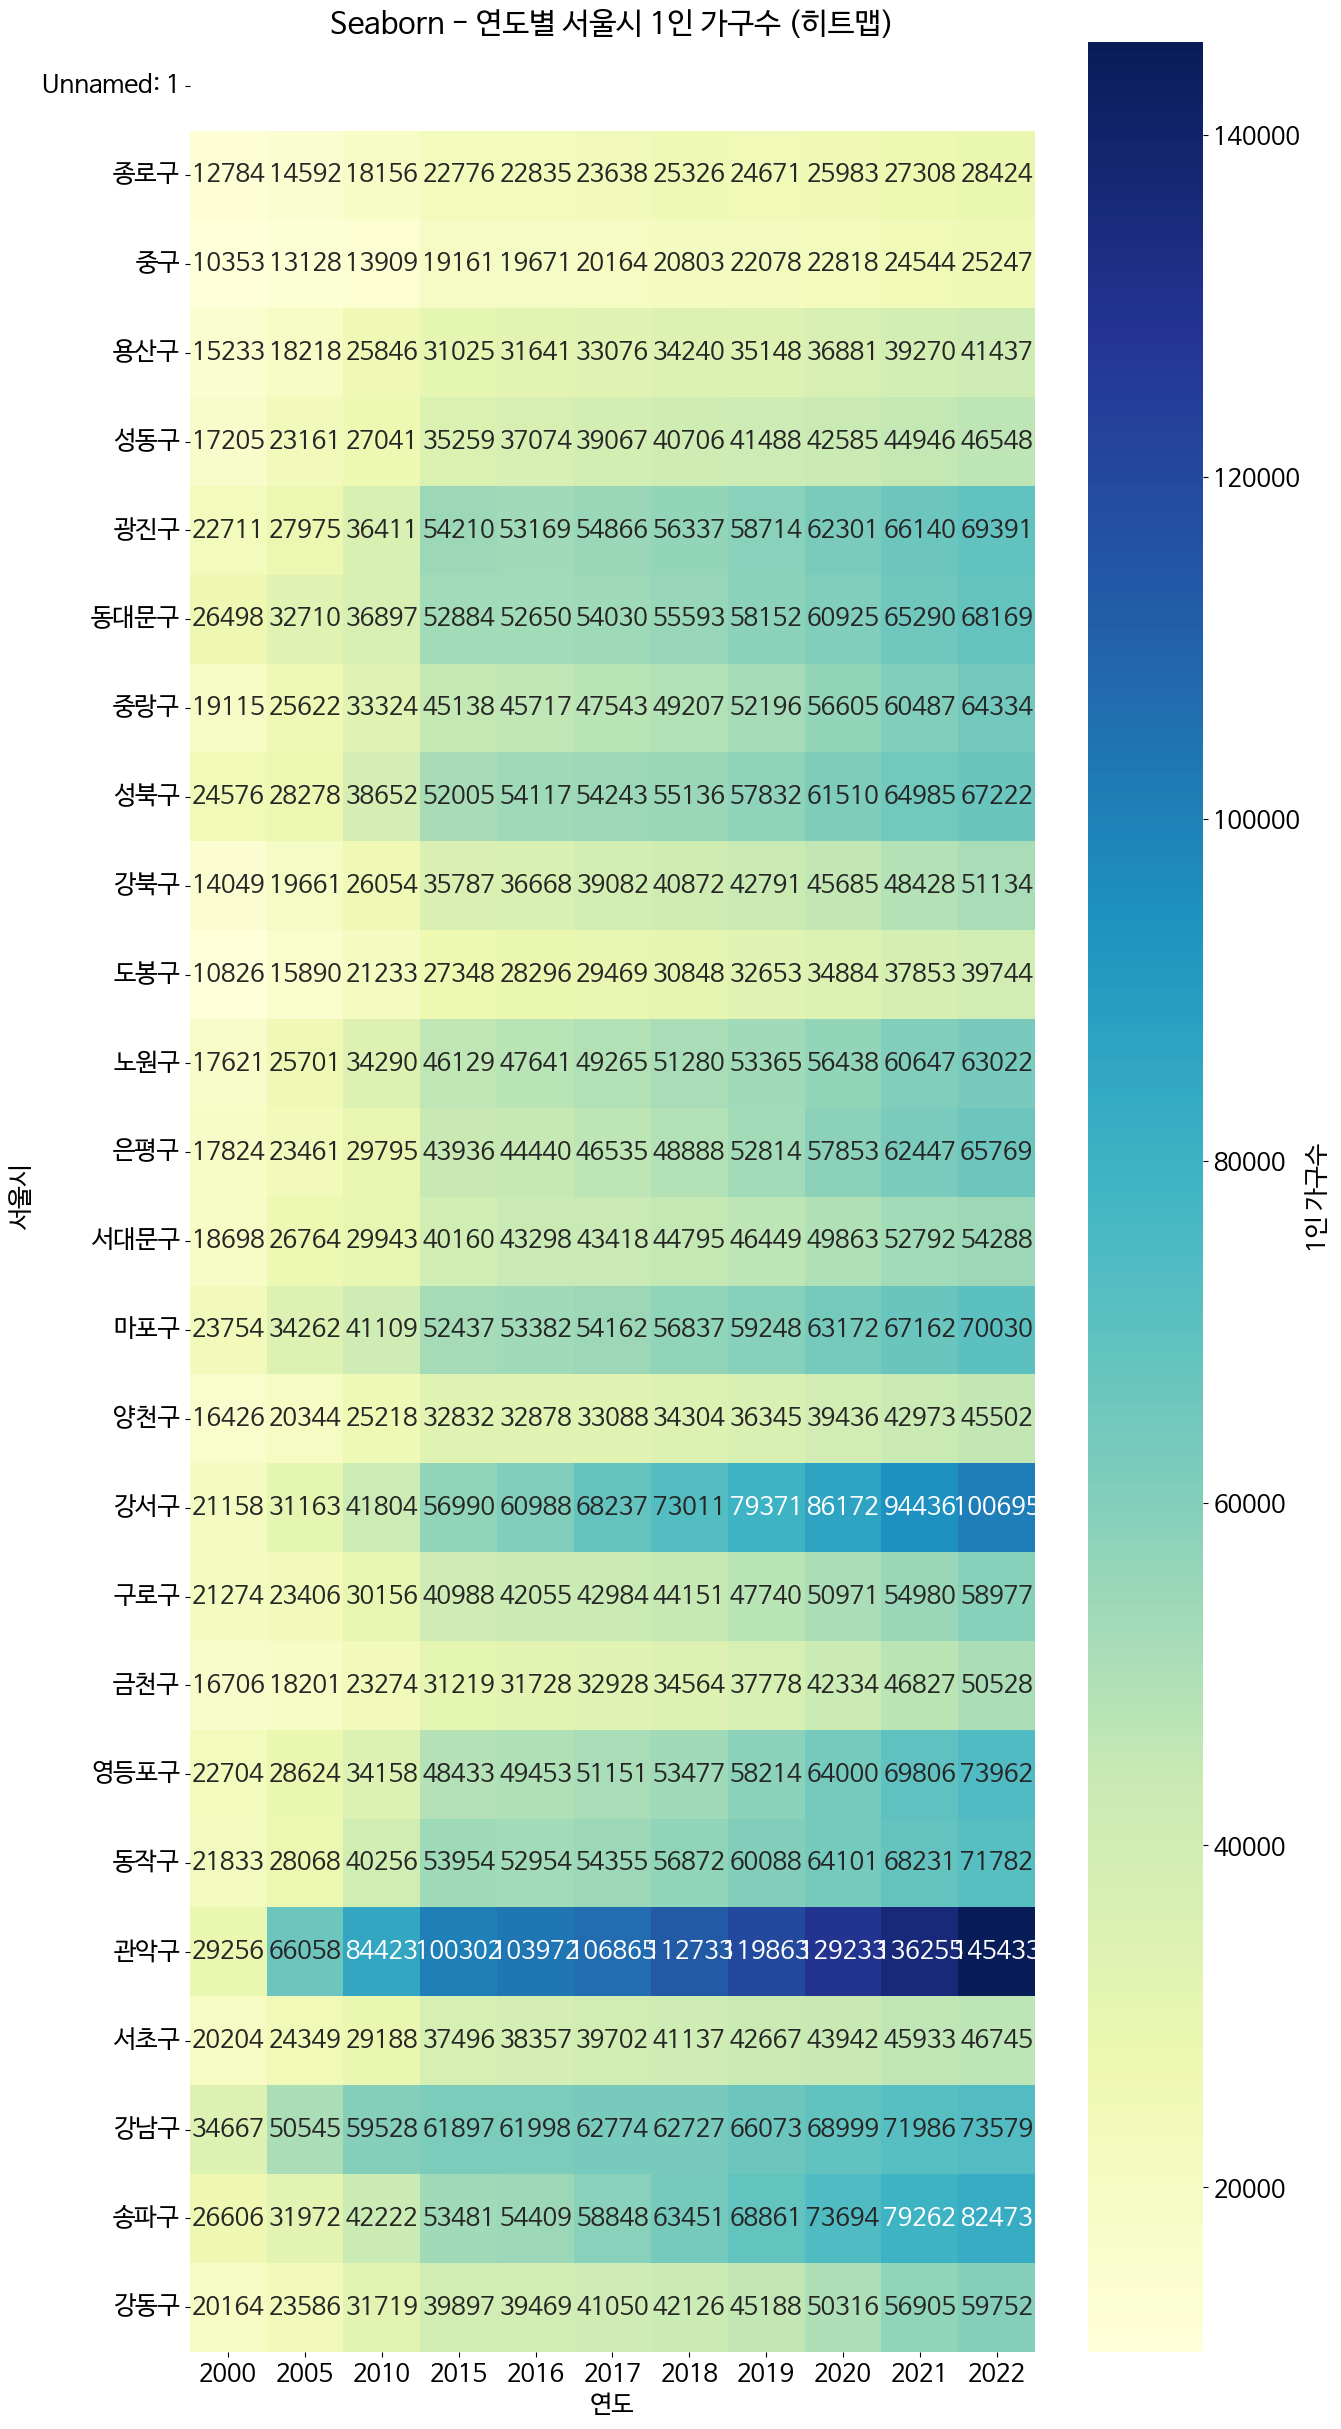

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

np.random.seed(42)
data = pd.read_excel(file_path)

data['Total'] = data.iloc[:, 1:].sum(axis=1)

# 선 그래프 (Matplotlib)
plt.figure(figsize=(10, 6))
plt.plot(data['연도'], data['Total'], label='Total Population', color='purple')

plt.title('연도별 서울시 1인 가구수')
plt.xlabel('연도')
plt.ylabel('서울시 1인 가구수')
plt.legend()
plt.show()

# 막대 그래프 (Seaborn)
plt.figure(figsize=(10, 6))
sns.barplot(x='연도', y='Total', data=data, color='purple')

plt.title('연도별 서울시 1인 가구수')
plt.xlabel('연도')
plt.ylabel('서울시 1인가구수')
plt.show()

# 선 그래프 (Plotly Express)
fig = px.line(data, x='연도', y='Total', title='연도별 서울시 1인 가구수', labels={'Total':'서울시 1인 가구수'})
fig.show()

# 막대 그래프 (Plotly Express)
fig = px.bar(data, x='연도', y='Total', title='연도별 서울시 1인 가구수')
fig.show()

# 히트맵 (Seaborn)
plt.figure(figsize=(30,30))
plt.subplot(1, 2, 1)
sns.heatmap(data.set_index('연도').iloc[:, 1:-1].T, cmap='YlGnBu', annot=True, fmt='.0f', cbar_kws={'label': '1인 가구수'})
plt.title('Seaborn - 연도별 서울시 1인 가구수 (히트맵)')
plt.xlabel('연도')
plt.ylabel('서울시')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



ARIMA 모델 예측 결과:
      예측  신뢰구간 (95%) 하한  신뢰구간 (95%) 상한
2023 NaN            NaN            NaN
2024 NaN            NaN            NaN
2025 NaN            NaN            NaN
2026 NaN            NaN            NaN
2027 NaN            NaN            NaN


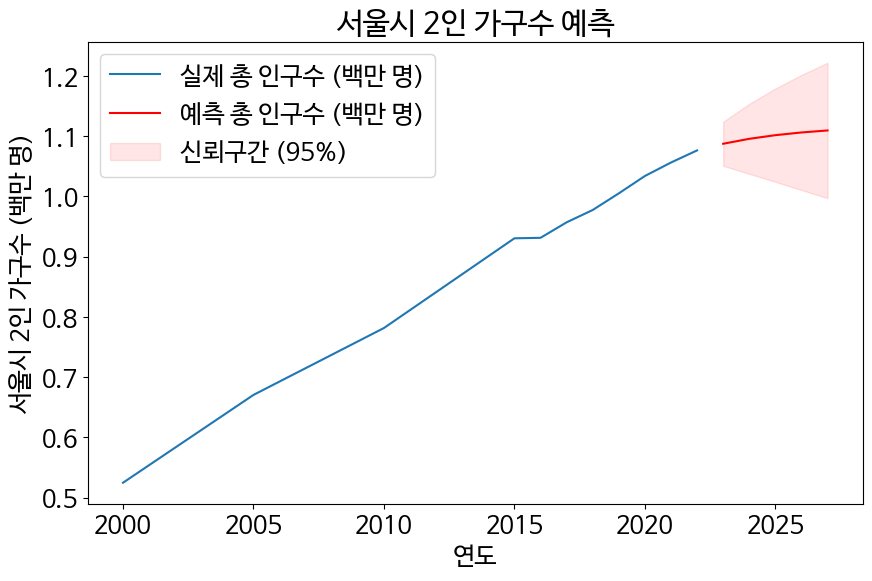

In [ ]:
# 서울시 2인 가구수 데이터 불러오기
file_path = '/content/demographics2.xlsx'
df = pd.read_excel(file_path)
df.set_index('연도', inplace=True)

# ARIMA 모델 학습 및 예측
total_population_data = df.sum(axis=1)

# ARIMA 모델 생성
model = ARIMA(total_population_data, order=(1, 1, 1))  # ARIMA(p, d, q)의 파라미터 조합 설정
results = model.fit()

# 미래 인구수 예측 (5년 후까지 예측)
forecast_steps = 5
forecast = results.get_forecast(steps=forecast_steps)

# 예측 결과 출력
forecast_index = range(df.index.max() + 1, df.index.max() + 1 + forecast_steps)
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

print("ARIMA 모델 예측 결과:")
print(pd.DataFrame({'예측': forecast_values, '신뢰구간 (95%) 하한': forecast_ci.iloc[:, 0], '신뢰구간 (95%) 상한': forecast_ci.iloc[:, 1]}, index=forecast_index))

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(df.index, total_population_data / 1_000_000, label='실제 총 인구수 (백만 명)')
plt.plot(forecast_index, forecast_values / 1_000_000, color='red', label='예측 총 인구수 (백만 명)')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0] / 1_000_000, forecast_ci.iloc[:, 1] / 1_000_000, color='red', alpha=0.1, label='신뢰구간 (95%)')
plt.title('서울시 2인 가구수 예측')
plt.xlabel('연도')
plt.ylabel('서울시 2인 가구수 (백만 명)')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



ARIMA 모델 예측 결과:
      예측  신뢰구간 (95%) 하한  신뢰구간 (95%) 상한
2023 NaN            NaN            NaN
2024 NaN            NaN            NaN
2025 NaN            NaN            NaN
2026 NaN            NaN            NaN
2027 NaN            NaN            NaN


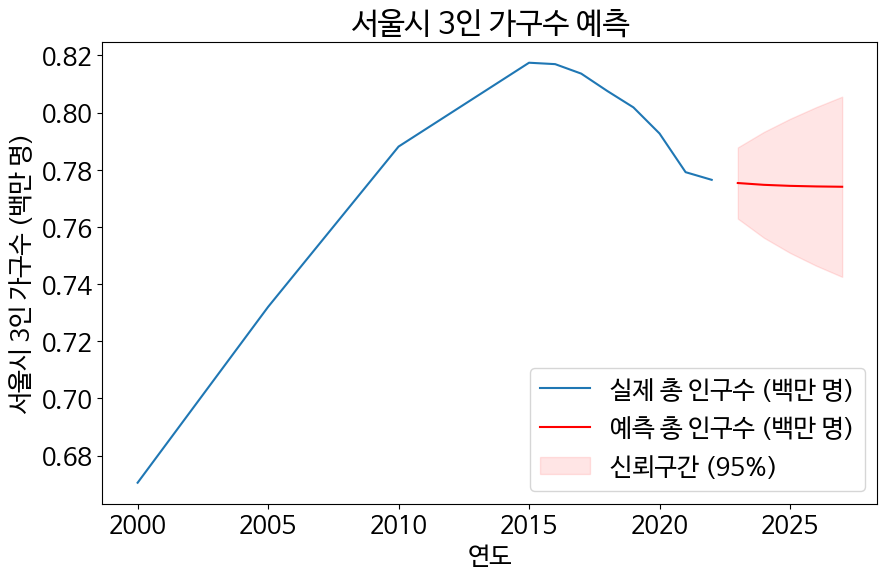

In [ ]:
# 서울시 3인 가구수 데이터 불러오기
file_path = '/content/demographics3.xlsx'
df = pd.read_excel(file_path)
df.set_index('연도', inplace=True)

# ARIMA 모델 학습 및 예측
total_population_data = df.sum(axis=1)

# ARIMA 모델 생성
model = ARIMA(total_population_data, order=(1, 1, 1))  # ARIMA(p, d, q)의 파라미터 조합 설정
results = model.fit()

# 미래 인구수 예측 (5년 후까지 예측)
forecast_steps = 5
forecast = results.get_forecast(steps=forecast_steps)

# 예측 결과 출력
forecast_index = range(df.index.max() + 1, df.index.max() + 1 + forecast_steps)
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

print("ARIMA 모델 예측 결과:")
print(pd.DataFrame({'예측': forecast_values, '신뢰구간 (95%) 하한': forecast_ci.iloc[:, 0], '신뢰구간 (95%) 상한': forecast_ci.iloc[:, 1]}, index=forecast_index))

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(df.index, total_population_data / 1_000_000, label='실제 총 인구수 (백만 명)')
plt.plot(forecast_index, forecast_values / 1_000_000, color='red', label='예측 총 인구수 (백만 명)')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0] / 1_000_000, forecast_ci.iloc[:, 1] / 1_000_000, color='red', alpha=0.1, label='신뢰구간 (95%)')
plt.title('서울시 3인 가구수 예측')
plt.xlabel('연도')
plt.ylabel('서울시 3인 가구수 (백만 명)')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



ARIMA 모델 예측 결과:
      예측  신뢰구간 (95%) 하한  신뢰구간 (95%) 상한
2023 NaN            NaN            NaN
2024 NaN            NaN            NaN
2025 NaN            NaN            NaN
2026 NaN            NaN            NaN
2027 NaN            NaN            NaN


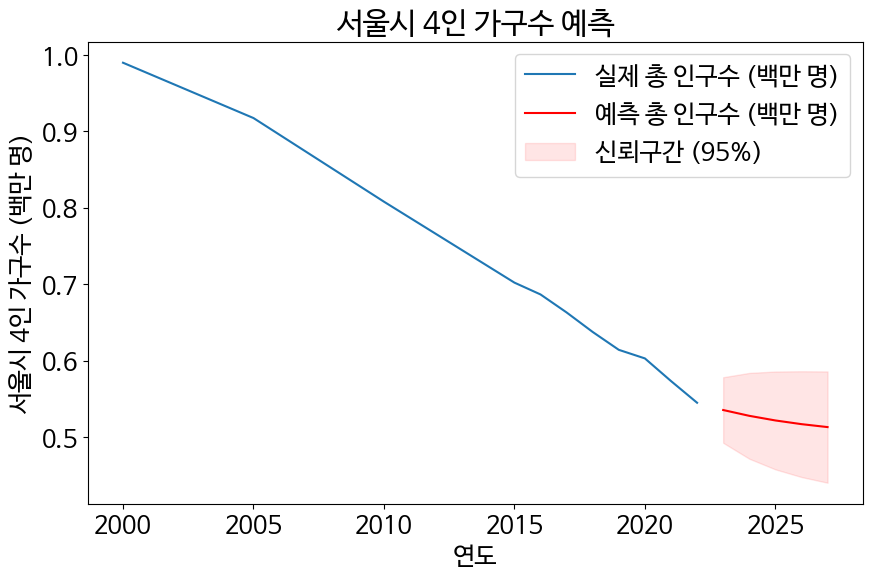

In [ ]:
# 서울시 4인 가구수 데이터 불러오기
file_path = '/content/demographics4.xlsx'
df = pd.read_excel(file_path)
df.set_index('연도', inplace=True)

# ARIMA 모델 학습 및 예측
total_population_data = df.sum(axis=1)

# ARIMA 모델 생성
model = ARIMA(total_population_data, order=(1, 1, 1))  # ARIMA(p, d, q)의 파라미터 조합 설정
results = model.fit()

# 미래 인구수 예측 (5년 후까지 예측)
forecast_steps = 5
forecast = results.get_forecast(steps=forecast_steps)

# 예측 결과 출력
forecast_index = range(df.index.max() + 1, df.index.max() + 1 + forecast_steps)
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

print("ARIMA 모델 예측 결과:")
print(pd.DataFrame({'예측': forecast_values, '신뢰구간 (95%) 하한': forecast_ci.iloc[:, 0], '신뢰구간 (95%) 상한': forecast_ci.iloc[:, 1]}, index=forecast_index))

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(df.index, total_population_data / 1_000_000, label='실제 총 인구수 (백만 명)')
plt.plot(forecast_index, forecast_values / 1_000_000, color='red', label='예측 총 인구수 (백만 명)')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0] / 1_000_000, forecast_ci.iloc[:, 1] / 1_000_000, color='red', alpha=0.1, label='신뢰구간 (95%)')
plt.title('서울시 4인 가구수 예측')
plt.xlabel('연도')
plt.ylabel('서울시 4인 가구수 (백만 명)')
plt.legend()
plt.show()